In [1]:
import torch
from time import time

a = torch.ones(1000)
b = torch.ones(1000)

In [2]:
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)


0.03599977493286133


In [3]:
start = time()
d = a + b
print(time() - start)

0.0


In [8]:
a = torch.ones(3)
b = 10
print(a + b)

tensor([11., 11., 11.])


In [4]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [5]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

In [6]:
labels


tensor([ 4.7616, -0.9139,  3.2697, -3.2965,  1.8917,  0.3532,  0.6614,  6.6258,
         4.5105,  8.8461,  6.0305,  9.9699,  5.5510, 10.5564,  1.5018,  7.5703,
         2.8301,  6.7623,  4.1976,  5.4717,  0.4290,  6.7826,  1.4799,  3.9208,
         3.5540,  1.7846,  6.9721, 12.3560, 12.1354,  7.4949,  4.5422,  3.1319,
        10.2357, -0.2969,  8.4091,  8.6996,  7.5170, -1.9387, -5.5260,  8.7825,
         1.3399,  4.8083,  6.0138, -2.5537,  1.5449, -6.9101,  3.3776, -0.7559,
        -1.3529, 10.1977,  4.5100,  5.6146,  4.9686, -0.4118,  6.7797, -0.1509,
         1.9060,  6.1728, -0.4419,  4.2868,  1.3896,  4.9279,  6.5908,  7.4588,
         3.8243, 10.0906,  0.2187, 10.4097,  2.1531, -0.3043, 11.5227,  5.9272,
         1.2603,  4.4753,  5.8267,  7.9258, -1.7069,  4.0844,  2.2210,  3.2652,
         0.4347, -5.6021,  0.0909,  3.8263, -1.2146,  3.8328,  0.1139,  4.4373,
         0.1280, -0.4109,  3.2728,  0.5942, -2.2463,  6.7483,  7.4791,  3.0034,
         0.9371,  2.4245,  5.5478,  7.38

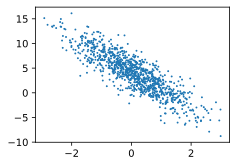

In [7]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import * 

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [9]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.1817, -2.5190],
        [-0.9414,  1.1688],
        [-0.1857,  0.6418],
        [-0.0354, -0.3631],
        [-0.9497,  0.7043],
        [ 0.8263,  2.6847],
        [-0.4568, -1.6004],
        [-2.1200,  1.8134],
        [-1.9629, -0.3553],
        [-0.2588,  0.8279]]) tensor([13.1253, -1.6622,  1.6421,  5.3651, -0.0857, -3.2965,  8.7160, -6.2125,
         1.4893,  0.8561])


In [10]:
w = torch.tensor(np.random.normal(0, 0.01 , (num_inputs, 1)), dtype=torch.float)
b = torch.zeros(1, dtype=torch.float32)

In [11]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

In [12]:
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b

In [14]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [20]:
epochs = 10
num_epochs = 5
for i in range(num_epochs) :
    for X,y in data_iter(batch_size, features, labels) :
        y_hat = linreg(X, w, b)
        loss = squared_loss(y_hat, y).sum()
        loss.backward()
        sgd([w,b], 0.01, batch_size)
        # sgd(b, 0.01, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = squared_loss(linreg(features, w, b), labels)
    print('epoch %d, loss %f' % (i + 1, train_l.mean().item()))

epoch 1, loss 0.007154
epoch 2, loss 0.001109
epoch 3, loss 0.000206
epoch 4, loss 0.000071
epoch 5, loss 0.000051


In [21]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9997],
        [-3.3982]], requires_grad=True)
4.2 
 tensor([4.1978], requires_grad=True)
